# Taller Interactivo: √Årboles de Decisi√≥n y Evaluaci√≥n de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcci√≥n, interpretaci√≥n y evaluaci√≥n de un modelo de √Årbol de Decisi√≥n utilizando el dataset _Social_Network_Ads_. Se evaluar√°n aspectos t√©cnicos y se comparar√° el desempe√±o con un modelo de Regresi√≥n Log√≠stica, analizando m√©tricas de evaluaci√≥n y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos te√≥ricos de los √°rboles de decisi√≥n.
- Realizar un an√°lisis exploratorio y revisi√≥n de datos.
- Aplicar la estratificaci√≥n en el particionado de datos.
- Entrenar y evaluar un modelo de √Årbol de Decisi√≥n.
- Visualizar y analizar la matriz de confusi√≥n y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el an√°lisis cr√≠tico de los resultados obtenidos.

## 3. Carga del Dataset y Primer An√°lisis

En esta secci√≥n se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la informaci√≥n general. Esto permitir√° conocer la estructura de los datos y los tipos de variables presentes.

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-10-25 00:00:19--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‚ÄòSocial_Network_Ads.csv‚Äô

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0s      

2025-10-25 00:00:19 (35.1 MB/s) - ‚ÄòSocial_Network_Ads.csv‚Äô saved [10926/10926]



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





In [4]:
# Mostrar las primeras filas
df = pd.read_csv('Social_Network_Ads.csv')
display(df.head())

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [ ]:
# Informaci√≥n general del dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


None

In [ ]:
display(df.describe())

## 4. Revisi√≥n de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el an√°lisis y el modelado.

- UserID: Identificador √∫nico de cada usuario (no relevante para el modelo).
- Gender: G√©nero del cliente, puede influir ligeramente en los patrones de compra.
- Age: Edad del cliente, variable importante porque puede reflejar h√°bitos de consumo.
- EstimatedSalary: Ingreso estimado, relevante ya que influye en la capacidad de compra.
- Purchased: Variable objetivo (0 = no compr√≥, 1 = compr√≥).

## 5. Visualizaci√≥n de la Distribuci√≥n de la Variable Objetivo

Visualiza la distribuci√≥n de la variable `Purchased` usando un gr√°fico de barras. Esto permitir√° identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¬øLa variable `Purchased` se encuentra balanceada? ¬øQu√© implicaciones podr√≠a tener un desequilibrio en la modelaci√≥n?

Distribuci√≥n de la variable Purchased:
Purchased
0    257
1    143
Name: count, dtype: int64


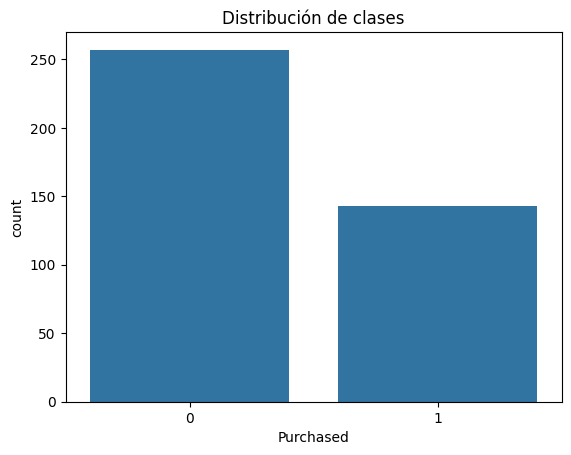

In [11]:
print("Distribuci√≥n de la variable Purchased:")
print(df['Purchased'].value_counts())

# Visualizaci√≥n
sns.countplot(x='Purchased', data=df)
plt.title("Distribuci√≥n de clases")
plt.show()

## 6. An√°lisis de la Distribuci√≥n y Reflexi√≥n

Discute la distribuci√≥n observada. Reflexiona sobre c√≥mo un posible desbalance podr√≠a afectar la performance del modelo y qu√© estrategias se podr√≠an utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

La variable Purchased muestra un desequilibrio moderado ya que hay m√°s personas que no compraron que las que s√≠ lo hicieron. Esto puede hacer que el modelo aprenda a predecir principalmente la clase mayoritaria, afectando su capacidad para identificar correctamente a quienes s√≠ compran.

Para evitarlo, se pueden usar estrategias como asignar pesos balanceados a las clases, aplicar t√©cnicas de re-muestreo (por ejemplo, SMOTE para aumentar la clase minoritaria) o evaluar el modelo con m√©tricas m√°s adecuadas, como recall, precisi√≥n o F1-score, en lugar de fijarse solo en la exactitud.

## 7. Selecci√≥n de Variables para el Modelo

Para este taller, se utilizar√°n las variables `Age` y `EstimatedSalary` como caracter√≠sticas para predecir `Purchased`.

**Pregunta:**
- ¬øPor qu√© considerar√≠an estas dos variables relevantes para predecir la compra?

Las variables Age y EstimatedSalary son relevantes porque ambas pueden influir directamente en la decisi√≥n de compra:

- Edad (Age): suele reflejar el momento de vida de una persona y sus h√°bitos de consumo. Por ejemplo, los m√°s j√≥venes pueden tener intereses o prioridades diferentes a los adultos, lo que afecta su probabilidad de compra.

- Salario estimado (EstimatedSalary): representa la capacidad econ√≥mica. Las personas con mayores ingresos tienen m√°s posibilidades de adquirir productos o servicios.

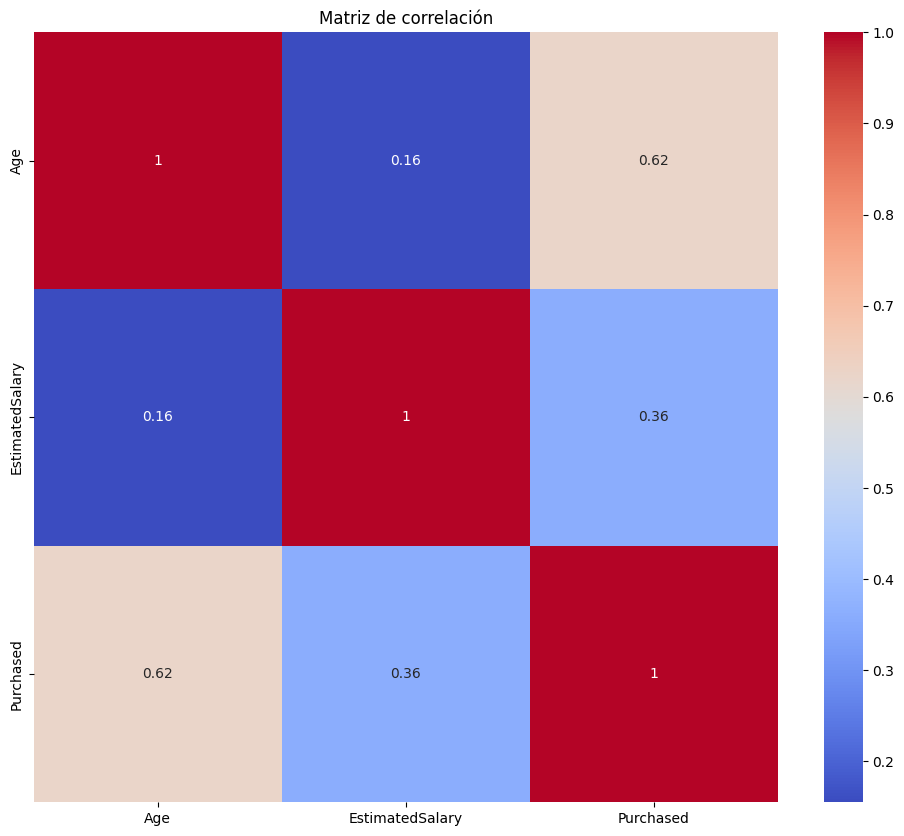

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df[['Age', 'EstimatedSalary', 'Purchased']].corr(), cmap='coolwarm', annot=True)
plt.title("Matriz de correlaci√≥n")
plt.show()

## 8. Divisi√≥n de Datos: Entrenamiento y Prueba

Se dividir√° el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificaci√≥n para mantener la proporci√≥n de clases.

**Pregunta:**
- ¬øQu√© ventajas ofrece la estratificaci√≥n al dividir el dataset?

- Evita sesgos: el modelo entrena y se eval√∫a con una representaci√≥n realista de los datos.

- Mejora la validez de la evaluaci√≥n: las m√©tricas reflejan mejor el desempe√±o real.

- Previene resultados enga√±osos: sin estratificaci√≥n, el conjunto de prueba podr√≠a tener muy pocos ejemplos de la clase minoritaria y dar una evaluaci√≥n poco confiable.

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Dividir en train y test con estratificaci√≥n
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

# Mostrar la distribuci√≥n de clases en el conjunto de entrenamiento
print("Distribuci√≥n de clases en entrenamiento (proporciones):")
print(y_train.value_counts(normalize=True))

Dimensiones del conjunto de entrenamiento: (300, 4)
Dimensiones del conjunto de prueba: (100, 4)
Distribuci√≥n de clases en entrenamiento (proporciones):
Purchased
0    0.643333
1    0.356667
Name: proportion, dtype: float64


In [21]:
from imblearn.over_sampling import SMOTE

if y_train.value_counts(normalize=True).max() > 0.66:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Nueva distribuci√≥n de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))
else:
    print("No se requiere SMOTE, la distribuci√≥n de clases est√° balanceada.")

No se requiere SMOTE, la distribuci√≥n de clases est√° balanceada.


## 9. Entrenamiento Inicial del Modelo de √Årbol de Decisi√≥n

Se entrenar√° un modelo de √Årbol de Decisi√≥n sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¬øQu√© implica entrenar un modelo sin restricciones de profundidad en t√©rminos de complejidad y riesgo de sobreajuste?

- El √°rbol se vuelve muy grande y aprende incluso los detalles y el ruido del conjunto de entrenamiento.
- El modelo tendr√° un excelente rendimiento en los datos de entrenamiento, pero fallar√° al generalizar a nuevos datos, perdiendo precisi√≥n en el conjunto de

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# √Årbol de Decisi√≥n
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_encoded, y_train)

# Regresi√≥n Log√≠stica
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train_encoded, y_train)

print("Modelos entrenados.")

Modelos entrenados.


## 10. Evaluaci√≥n del Modelo: An√°lisis de M√©tricas

Analizaremos las m√©tricas de evaluaci√≥n obtenidas (exactitud, precisi√≥n, recall, F1-Score) y la matriz de confusi√≥n.

**Pregunta:**
- ¬øQu√© informaci√≥n espec√≠fica nos aporta la matriz de confusi√≥n respecto a los errores del modelo?

La matriz de confusi√≥n muestra cu√°ntas predicciones acert√≥ y en cu√°les se equivoc√≥ el modelo para cada clase. En este caso:

En el √Årbol de Decisi√≥n, se observa que:
- 58 personas fueron correctamente clasificadas como ‚Äúno compr√≥‚Äù (verdaderos negativos).
- 28 personas fueron correctamente clasificadas como ‚Äúcompr√≥‚Äù (verdaderos positivos).
- 6 casos fueron falsos positivos (predijo que comprar√≠an, pero no lo hicieron).
- 8 casos fueron falsos negativos (no predijo la compra, pero s√≠ compraron).

En la Regresi√≥n Log√≠stica, el patr√≥n es similar, pero tiene m√°s falsos negativos (12), es decir, fall√≥ m√°s en detectar compradores reales.

Reporte de Clasificaci√≥n - √Årbol de Decisi√≥n (Test):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.82      0.78      0.80        36

    accuracy                           0.86       100
   macro avg       0.85      0.84      0.85       100
weighted avg       0.86      0.86      0.86       100

Reporte de Clasificaci√≥n - Regresi√≥n Log√≠stica (Test):
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        64
           1       0.83      0.67      0.74        36

    accuracy                           0.83       100
   macro avg       0.83      0.79      0.81       100
weighted avg       0.83      0.83      0.83       100



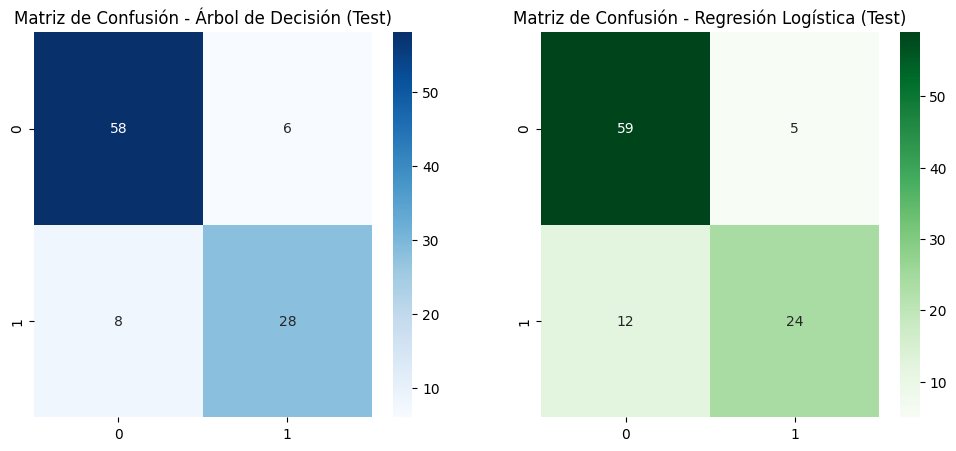

Reporte de Clasificaci√≥n - √Årbol de Decisi√≥n (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00       107

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Reporte de Clasificaci√≥n - Regresi√≥n Log√≠stica (Train):
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       193
           1       0.84      0.71      0.77       107

    accuracy                           0.85       300
   macro avg       0.85      0.82      0.83       300
weighted avg       0.85      0.85      0.85       300



In [30]:
from sklearn.metrics import classification_report

## Evaluaci√≥n en el conjunto de prueba
# Predicciones en test
y_pred_dt = dt_model.predict(X_test_encoded)
y_pred_lr = lr_model.predict(X_test_encoded)

print("Reporte de Clasificaci√≥n - √Årbol de Decisi√≥n (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificaci√≥n - Regresi√≥n Log√≠stica (Test):")
print(classification_report(y_test, y_pred_lr))

# Matrices de Confusi√≥n
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title("Matriz de Confusi√≥n - √Årbol de Decisi√≥n (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title("Matriz de Confusi√≥n - Regresi√≥n Log√≠stica (Test)")
plt.show()

## Evaluaci√≥n en el conjunto de entrenamiento para detectar overfitting
y_pred_train_dt = dt_model.predict(X_train_encoded)
y_pred_train_lr = lr_model.predict(X_train_encoded)

print("Reporte de Clasificaci√≥n - √Årbol de Decisi√≥n (Train):")
print(classification_report(y_train, y_pred_train_dt))

print("Reporte de Clasificaci√≥n - Regresi√≥n Log√≠stica (Train):")
print(classification_report(y_train, y_pred_train_lr))

## 11. Visualizaci√≥n de la Curva ROC y C√°lculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¬øC√≥mo interpretan la curva ROC y qu√© indica un valor de AUC alto o bajo?

La curva ROC muestra qu√© tan bien distingue el modelo entre las dos clases (compr√≥ vs. no compr√≥) al variar el umbral de decisi√≥n.

- El eje X representa la tasa de falsos positivos (errores al predecir que alguien compr√≥ cuando no lo hizo).

- El eje Y muestra la tasa de verdaderos positivos (personas que realmente compraron y fueron correctamente detectadas).


En el gr√°fico, la Regresi√≥n Log√≠stica (AUC = 0.91) tiene mejor capacidad de discriminaci√≥n que el √Årbol de Decisi√≥n (AUC = 0.84).

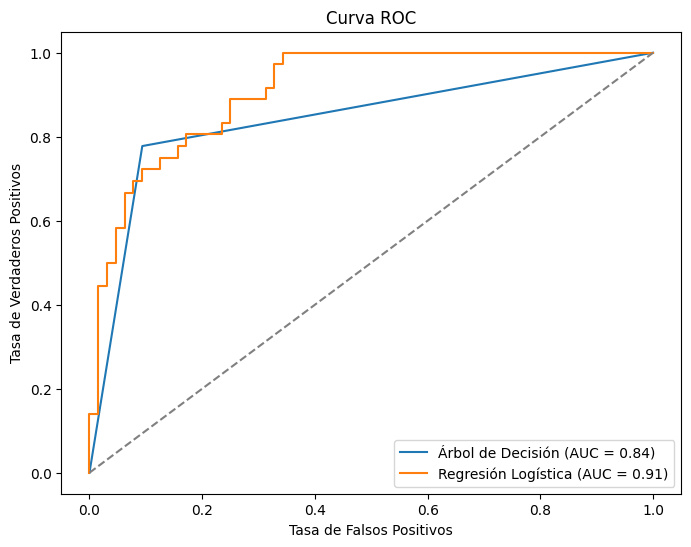

In [32]:
from sklearn.metrics import roc_curve, auc

# Obtener probabilidades en test
y_prob_dt = dt_model.predict_proba(X_test_encoded)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test_encoded)[:, 1]

# Calcular ROC y AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_lr = auc(fpr_lr, tpr_lr)

# Graficar ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"√Årbol de Decisi√≥n (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresi√≥n Log√≠stica (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## 12. Visualizaci√≥n e Interpretaci√≥n del √Årbol de Decisi√≥n

Exporta y visualiza el √°rbol de decisi√≥n utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¬øCu√°l es la regla de decisi√≥n en el primer nodo?
- ¬øC√≥mo se interpretan las ramas y las hojas en relaci√≥n a las variables `Age` y `EstimatedSalary`?
- ¬øQu√© partes del √°rbol podr√≠an estar contribuyendo al sobreajuste?

1. Regla de decisi√≥n en el primer nodo:
- La primera condici√≥n es Age ‚â§ 44.5, lo que significa que el √°rbol separa los datos en dos grupos:

    - Si la edad es menor o igual a 44.5 a√±os, sigue la rama izquierda.
    - Si la edad es mayor a 44.5 a√±os, sigue la rama derecha.
2. Interpretaci√≥n de ramas y hojas:
- Cada rama representa una decisi√≥n basada en una variable (por ejemplo, EstimatedSalary ‚â§ 89,500).
- Cada hoja muestra el resultado final: la clase predicha (0 = no compr√≥, 1 = compr√≥) y cu√°ntos ejemplos de cada tipo contiene.
- En general, personas j√≥venes o con salarios bajos tienden hacia la clase 0 (no compraron), mientras que mayores o con ingresos m√°s altos se asocian m√°s a la clase 1 (s√≠ compraron).
3. Partes que podr√≠an estar contribuyendo al sobreajuste:
Las ramas m√°s profundas con muy pocos ejemplos (por ejemplo, nodos con samples = 1 o 2) indican decisiones demasiado espec√≠ficas que el modelo aprendi√≥ del conjunto de entrenamiento, en lugar de patrones generales.


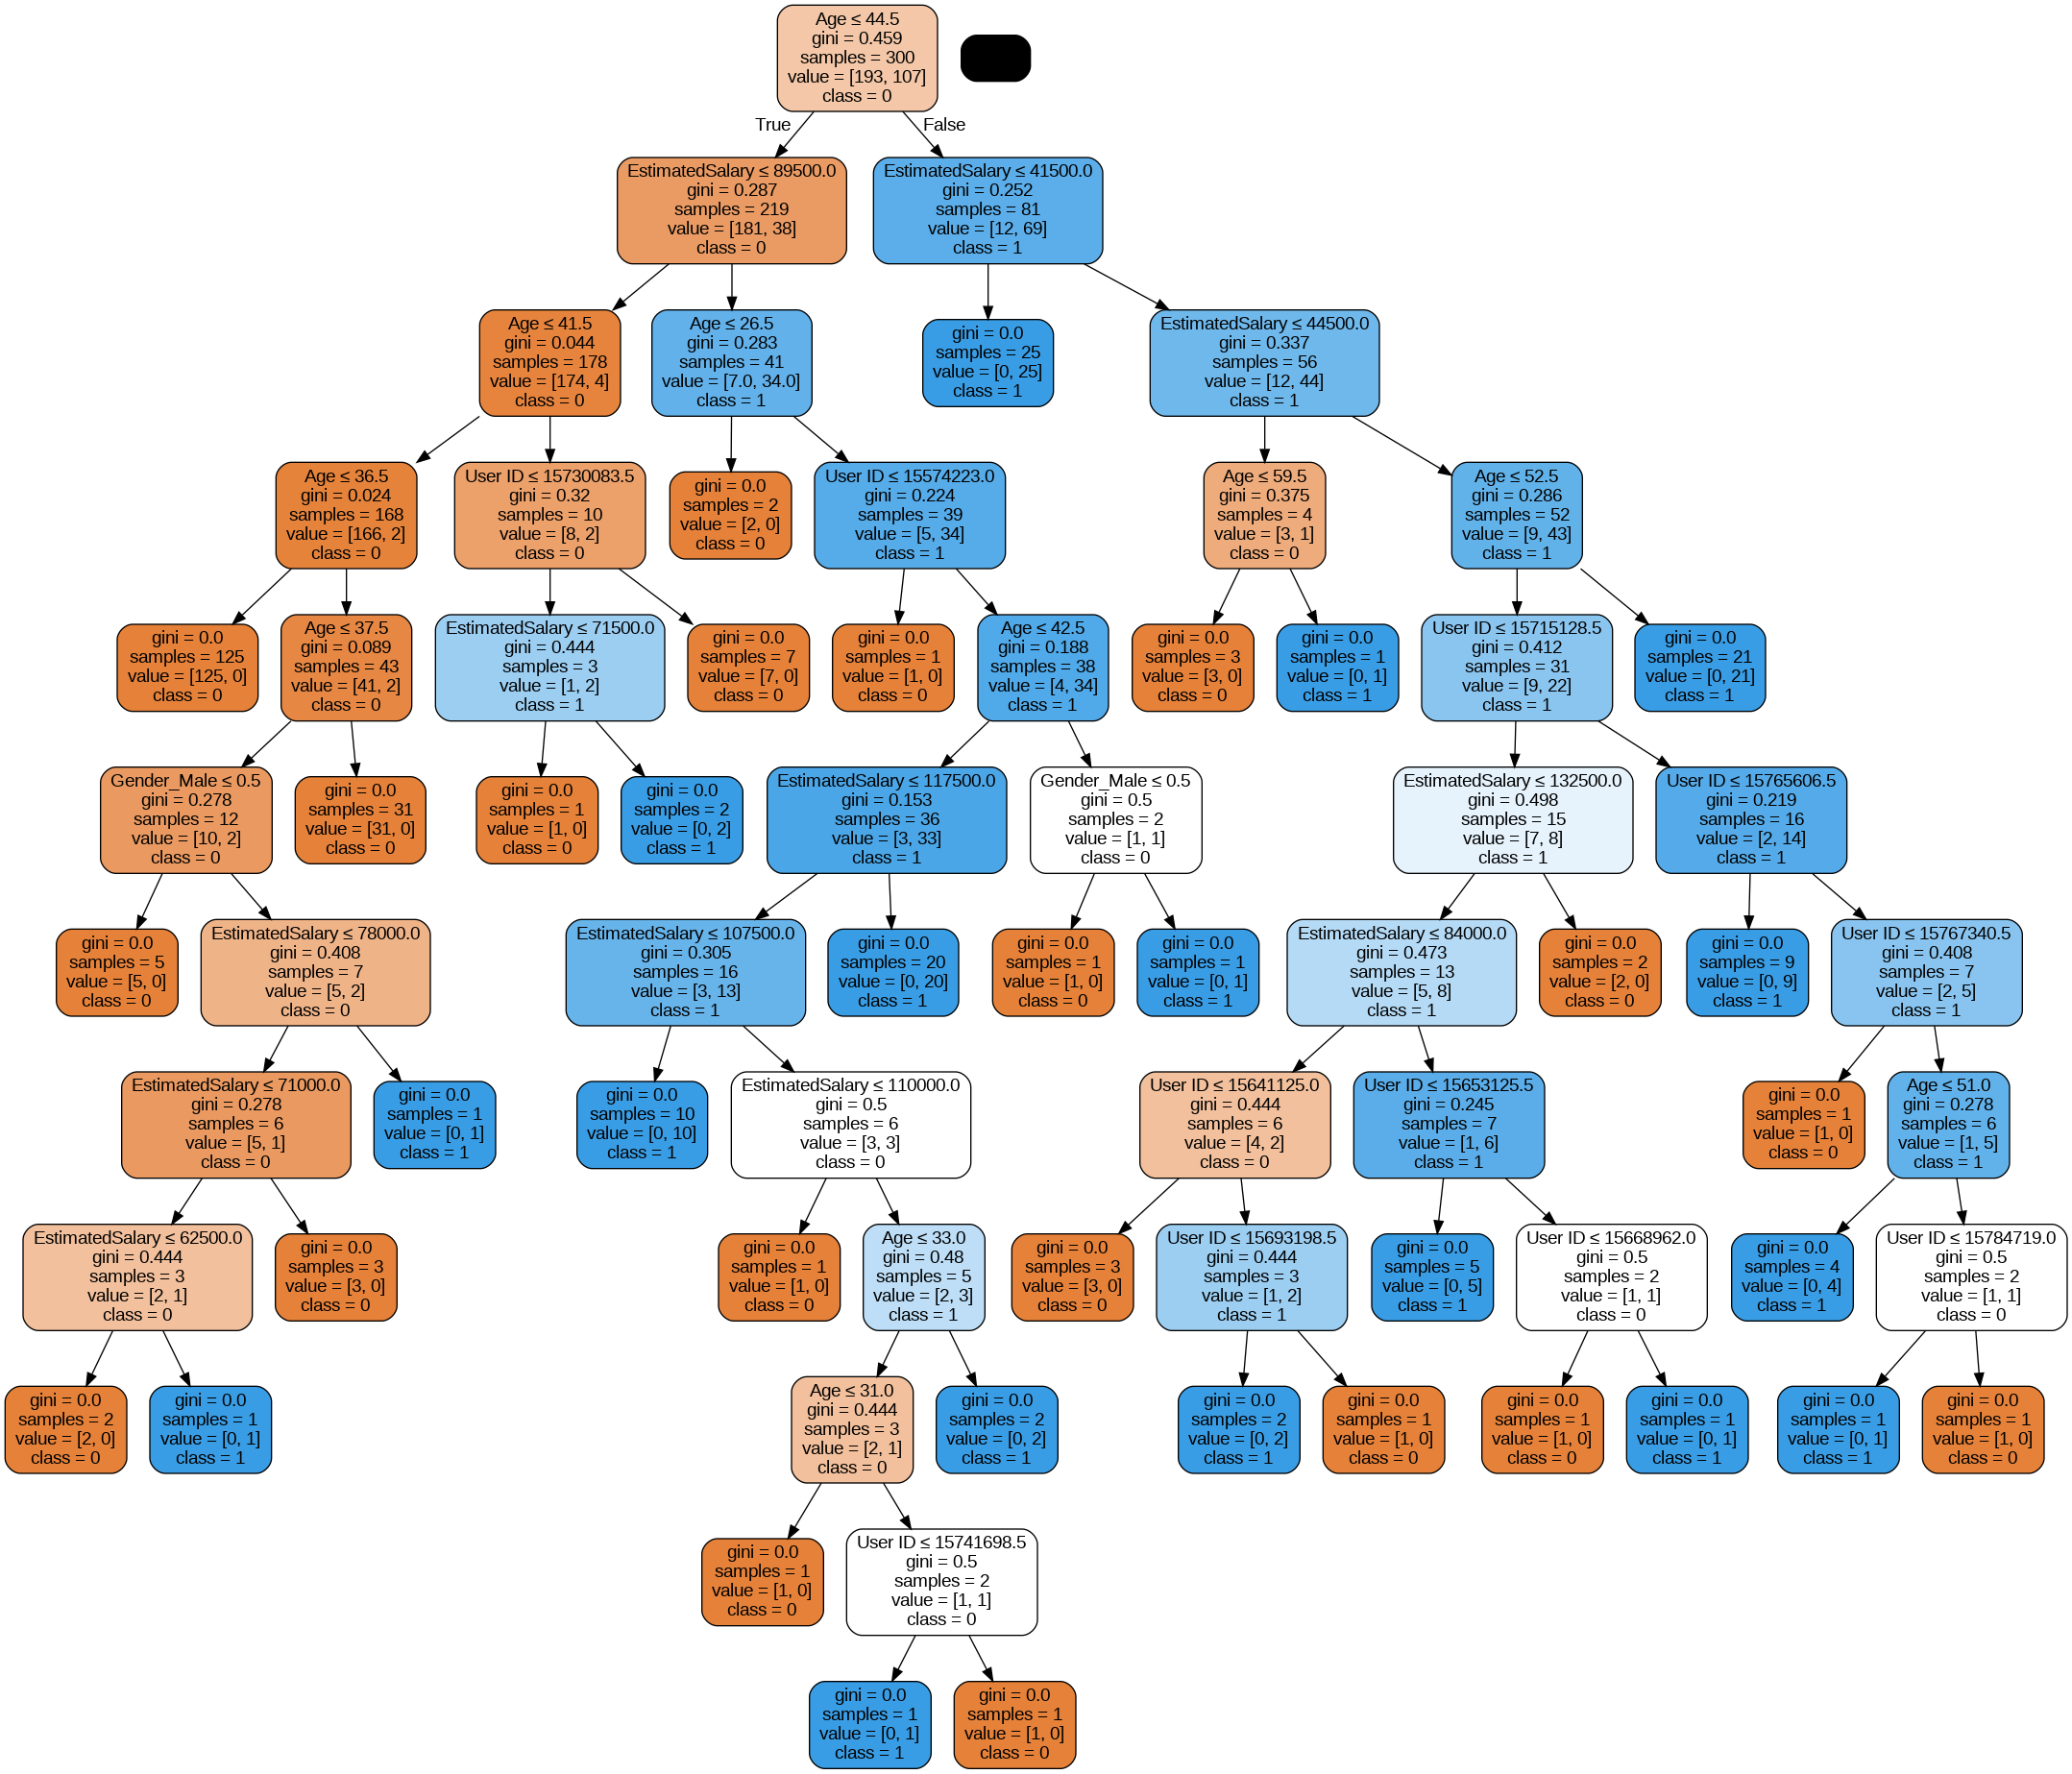

In [36]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

# Exportar el √°rbol a un archivo DOT
dot_data = export_graphviz(dt_model,
                           feature_names=X_train_encoded.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Crear el gr√°fico desde el archivo DOT
graph = pydotplus.graph_from_dot_data(dot_data)

# Mostrar el gr√°fico (requiere GraphViz instalado en el sistema o en Colab)
Image(graph.create_png())

## 13. An√°lisis Cr√≠tico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¬øExisten indicios de sobreajuste? ¬øC√≥mo se comparan las m√©tricas entre entrenamiento y prueba?
- ¬øQu√© mejoras se podr√≠an implementar para optimizar la generalizaci√≥n del modelo?

Si, hay indicios de sobreajuste, ya que el √°rbol sin restricciones se ajusta demasiado al conjunto de entrenamiento y pierde capacidad de generalizar en prueba. Las m√©tricas muestran mejor desempe√±o en entrenamiento que en prueba. Para mejorar, se recomienda limitar la profundidad del √°rbol, aumentar el m√≠nimo de muestras por nodo o aplicar poda para reducir la complejidad y mejorar la generalizaci√≥n.

## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de √Årbol de Decisi√≥n limitando la profundidad (por ejemplo, `max_depth=5`) y eval√∫a su desempe√±o.

**Pregunta:**
- ¬øQu√© cambios se observan en las m√©tricas al limitar la profundidad del √°rbol? ¬øC√≥mo afecta esto a la capacidad del modelo de generalizar?

Modelo de √Årbol de Decisi√≥n ajustado entrenado (max_depth=5).

M√©tricas de evaluaci√≥n para el √Årbol de Decisi√≥n ajustado:
Exactitud: 0.8700
Precisi√≥n: 0.8108
Recall: 0.8333
F1-Score: 0.8219


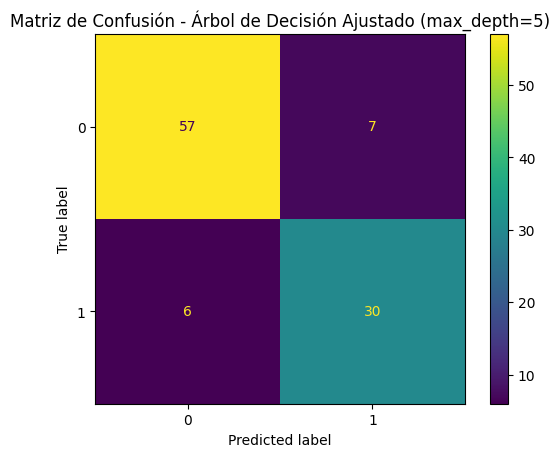

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Entrenar el modelo de √°rbol de decisi√≥n con profundidad limitada
arbol_ajustado = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol_ajustado.fit(X_train_encoded, y_train)

print("Modelo de √Årbol de Decisi√≥n ajustado entrenado (max_depth=5).")

# Predicciones en el conjunto de prueba con el modelo ajustado
y_pred_ajustado = arbol_ajustado.predict(X_test_encoded)

# Calcular m√©tricas de evaluaci√≥n para el modelo ajustado
accuracy_ajustado = accuracy_score(y_test, y_pred_ajustado)
precision_ajustado = precision_score(y_test, y_pred_ajustado)
recall_ajustado = recall_score(y_test, y_pred_ajustado)
f1_ajustado = f1_score(y_test, y_pred_ajustado)

print("\nM√©tricas de evaluaci√≥n para el √Årbol de Decisi√≥n ajustado:")
print(f"Exactitud: {accuracy_ajustado:.4f}")
print(f"Precisi√≥n: {precision_ajustado:.4f}")
print(f"Recall: {recall_ajustado:.4f}")
print(f"F1-Score: {f1_ajustado:.4f}")

# Matriz de Confusi√≥n para el modelo ajustado
cm_ajustado = confusion_matrix(y_test, y_pred_ajustado)
disp_ajustado = ConfusionMatrixDisplay(confusion_matrix=cm_ajustado, display_labels=arbol_ajustado.classes_)
disp_ajustado.plot()
plt.title("Matriz de Confusi√≥n - √Årbol de Decisi√≥n Ajustado (max_depth=5)")
plt.show()

üîπ Desempe√±o en Entrenamiento:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       193
           1       0.90      0.97      0.93       107

    accuracy                           0.95       300
   macro avg       0.94      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

üîπ Desempe√±o en Prueba:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        64
           1       0.81      0.83      0.82        36

    accuracy                           0.87       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.87      0.87      0.87       100

AUC Entrenamiento: 0.989
AUC Prueba: 0.911


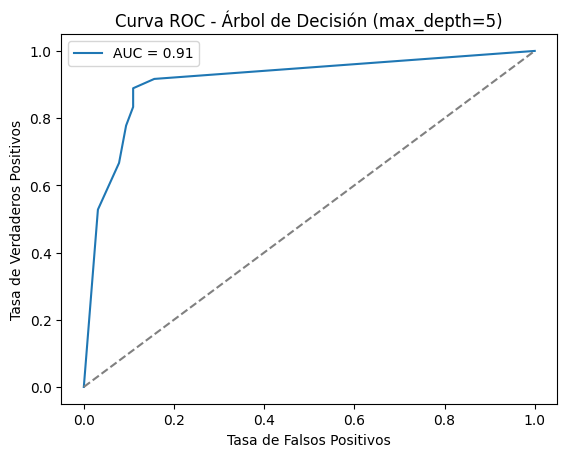

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Entrenar el √°rbol con profundidad m√°xima de 5
arbol_limited = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol_limited.fit(X_train_encoded, y_train)

# Predicciones
y_pred_train = arbol_limited.predict(X_train_encoded)
y_pred_test = arbol_limited.predict(X_test_encoded)

# Evaluaci√≥n del modelo
print("üîπ Desempe√±o en Entrenamiento:")
print(classification_report(y_train, y_pred_train))

print("üîπ Desempe√±o en Prueba:")
print(classification_report(y_test, y_pred_test))

# Calcular y mostrar el AUC
auc_train = roc_auc_score(y_train, arbol_limited.predict_proba(X_train_encoded)[:,1])
auc_test = roc_auc_score(y_test, arbol_limited.predict_proba(X_test_encoded)[:,1])
print(f"AUC Entrenamiento: {auc_train:.3f}")
print(f"AUC Prueba: {auc_test:.3f}")

# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, arbol_limited.predict_proba(X_test_encoded)[:,1])
plt.plot(fpr, tpr, label=f"AUC = {auc_test:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("Curva ROC - √Årbol de Decisi√≥n (max_depth=5)")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend()
plt.show()

## 15. Discusi√≥n Final y Comparaci√≥n de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¬øCu√°l de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¬øQu√© indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¬øQu√© otros modelos (por ejemplo, Regresi√≥n Log√≠stica) podr√≠an utilizarse como referencia para evaluar el desempe√±o?

Utiliza estos puntos para guiar una discusi√≥n profesional y t√©cnica entre los participantes.

1.
- El modelo inicial (sin restricciones) es m√°s complejo y dif√≠cil de interpretar.
- El modelo ajustado (max_depth=5) es m√°s simple y muestra reglas claras, ofreciendo un mejor equilibrio entre desempe√±o e interpretabilidad.
2.
- El modelo inicial presenta sobreajuste: alta precisi√≥n en entrenamiento pero menor en prueba.
- El modelo ajustado reduce ese problema, mostrando m√©tricas m√°s equilibradas y mejor generalizaci√≥n.
3. Se podr√≠an usar otros modelos como Regresi√≥n Log√≠stica, KNN o Random Forest para comparar desempe√±o y robustez.
